## Questions To Answer
- Who Attended (Founders, Talents, Recruiters)?
- What Attendees Want?
- How Can the TDN help them?
- Who to Answer?

## 1. Importing Libraries, Loading Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\user\Desktop\Data_Analyst\TDN_Network\Insights_Vio\Datasets\2025_Africa_Startup&VC_Landscape_Preview_for_Founders_Investors_LPs_DFIs_and_Public_Officials_Guests.csv')
df.head()

,api_id,name,email,phone_number,created_at,approval_status,custom_source,has_joined_event,amount,amount_tax,...,Company Website,Company Contact,If Founder: Are You Currently Raising Funds?,Startups: What region does your company focus on?,What is your LinkedIn profile?,What is your Instagram username?,What is your X (Twitter) handle?,What is your YouTube channel?,Startups: What sector does your startup operate in?,What are your expectations for this conference?
0,gst-zsnn1fEumf6SFCt,Ifeoluwadayo Adeoluwadotun,a.ifeoluwadayo@gmail.com,2.348023e+12,2025-01-23T12:52:51.243Z,approved,NaN,Yes,$0.00,$0.00,...,www.filmorealestate.com,8022588000,No,Africa,https://www.linkedin.com/in/dr-ifeoluwadayo-ad...,NaN,NaN,NaN,Tech,To learn from industry expert on industry trend
1,gst-0w1c7N7Sts1HY1h,Amit,a.narang@corongroup.net,9.193161e+11,2024-12-26T06:55:24.872Z,approved,NaN,Yes,NaN,NaN,...,www.corongroup.net,Amit K Narang,No,Global,https://www.linkedin.com/in/amit-k-narang-5148...,NaN,NaN,NaN,NaN,Networking for New Projects and Founders in Af...
2,gst-q6BndfUhOmxdYaJ,Ademidun Akindele,aakindele@octerracapital.com,NaN,2025-01-14T12:46:32.891Z,approved,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,https://www.linkedin.com/in/ademidun-akindele-...,NaN,NaN,NaN,NaN,As a VC investor and stakeholder in the Africa...
3,gst-YaeCiJMIhRkkCZ2,Aliyu Abdullahi Aliyu,aaliyuabdullahi2@gmail.com,2.347036e+12,2025-01-22T11:53:12.873Z,approved,NaN,Yes,$0.00,$0.00,...,Smai.com.ng,2348131179337,No,Africa,https://www.linkedin.com/in/aliyu-abdullahi-82...,Aleeyu_20,https://x.com/AliyuAliyu2020?s=09,https://youtube.com/@aliyuabdullahialiyu47?si=...,Tech,To Connect with Tech Leaders especially iyinoluwa
4,gst-DME8YirnsF6nCtj,Aanuoluwapo Agboola,aanuoluwapoagboola@gmail.com,2.348052e+12,2025-01-23T05:32:28.381Z,approved,NaN,Yes,$0.00,$0.00,...,NaN,NaN,Yes,Africa,https://www.linkedin.com/in/aanuoluwapo-agbool...,NaN,NaN,@oramediacompany,Agriculture,To meet willing investors and more enthusiasts...


## 2. Data Cleanup and Feature Engineering

In [ ]:
# Step 1: Clean 'phone_number' field
df['phone_number'] = df['phone_number'].fillna(0).astype('int64').astype(str)
df['phone_number'] = df['phone_number']

# Replace all null values with "No Input"
df.fillna("No Input", inplace=True)

# Step 2: Rename 'created_at' to 'date_created' and Convert to datetime
df = df.rename(columns={
    'created_at' : 'date_created',
    'What best describes you?' : 'describe_attendee', 
    'What best describes your organization?' : 'describe_organization',
    'If Founder: Are You Currently Raising Funds?' : 'founder_raising_fund?',
    'Startups: What region does your company focus on?' : 'startup_company_region',
    'What are your expectations for this conference?' : 'conference_expectation',
    'Company Name' : 'company_name',
    'Company Email' : 'company_email',
    'Company Website' : 'company_website',
    'Company Contact' : 'company_contact',
    'Short Bio' : 'short_bio',
    })
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['date_created'] = pd.to_datetime(df['date_created'].dt.strftime('%Y-%m-%d %H:%M:%S'))


# Step 4: Drop Irrelevant Columns (columns with no data at all)
irrelevant_cols = ['coupon_code', 'amount', 'amount_tax', 'amount_discount', 'custom_source', 'currency' 'eth_address', 'solana_address', 
                   'survey_response_rating', 'survey_response_feedback']
df = df.drop(columns=irrelevant_cols, errors='ignore')

df.to_excel('Cleaned_Datasets/Cleaned_Africa_Startup_2025.xlsx')

## 3. Visualization

### 3.1 Who Attended (Founders, Talents, Recruiters)?

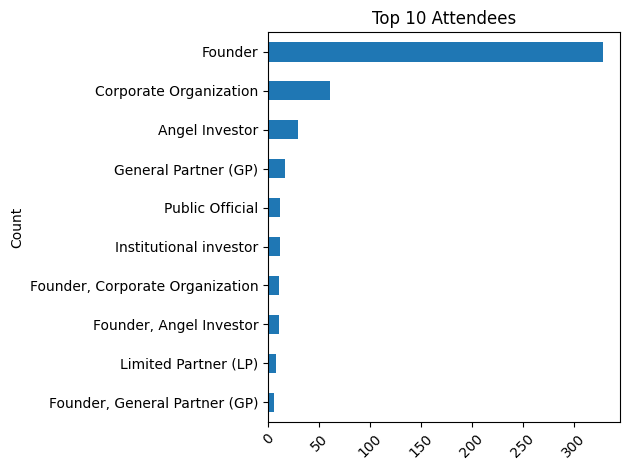

In [ ]:
top10_attendees = df[df['describe_attendee'] != "No Input"]['describe_attendee'].value_counts().nlargest(10)

top10_attendees.sort_values().plot(kind='barh', title='Top 10 Attendees')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.2  What do our top Attendees want?

### 3.3  How Can the TDN help them?

### 3.4  Who to Answer?